In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bike_sales_100k.csv')
df

,Sale_ID,Date,Customer_ID,Bike_Model,Price,Quantity,Store_Location,Salesperson_ID,Payment_Method,Customer_Age,Customer_Gender
0,1,11-07-2022,9390,Cruiser,318.32,1,Philadelphia,589,Apple Pay,70,Female
1,2,03-05-2024,3374,Hybrid Bike,3093.47,4,Chicago,390,Apple Pay,37,Male
2,3,01-09-2022,2689,Folding Bike,4247.99,3,San Antonio,338,PayPal,59,Female
3,4,28-09-2022,3797,Mountain Bike,1722.01,3,San Antonio,352,Apple Pay,19,Male
4,5,05-01-2021,1633,BMX,3941.44,3,Philadelphia,580,PayPal,67,Female
...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,16-06-2022,7584,Hybrid Bike,3088.13,2,Philadelphia,116,PayPal,60,Female
99996,99997,09-12-2023,9076,Road Bike,1051.44,2,Phoenix,153,Credit Card,67,Female
99997,99998,14-02-2020,3944,Folding Bike,2783.79,4,Phoenix,124,Google Pay,37,Female
99998,99999,13-12-2023,3334,Hybrid Bike,4265.42,4,Philadelphia,610,Credit Card,57,Male


In [3]:
print("\n=== Info Dataset ===")
print(df.info())

print("\n=== Missing Values ===")
print(df.isnull().sum())

print("\n=== Deskripsi Statistik Numerik ===")
print(df.describe())

print("\n=== Deskripsi Statistik Kategorikal ===")
print(df.describe(include=['object']))


=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sale_ID          100000 non-null  int64  
 1   Date             100000 non-null  object 
 2   Customer_ID      100000 non-null  int64  
 3   Bike_Model       100000 non-null  object 
 4   Price            100000 non-null  float64
 5   Quantity         100000 non-null  int64  
 6   Store_Location   100000 non-null  object 
 7   Salesperson_ID   100000 non-null  int64  
 8   Payment_Method   100000 non-null  object 
 9   Customer_Age     100000 non-null  int64  
 10  Customer_Gender  100000 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 8.4+ MB
None

=== Missing Values ===
Sale_ID            0
Date               0
Customer_ID        0
Bike_Model         0
Price              0
Quantity           0
Store_Location     0
Salesperson_ID     

In [4]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

print("\nTanggal yang gagal diparse:")
print(df[df['Date'].isnull()])

df = df.dropna(subset=['Date'])

print("\nJumlah data duplikat:", df.duplicated().sum())



Tanggal yang gagal diparse:
Empty DataFrame
Columns: [Sale_ID, Date, Customer_ID, Bike_Model, Price, Quantity, Store_Location, Salesperson_ID, Payment_Method, Customer_Age, Customer_Gender]
Index: []

Jumlah data duplikat: 0


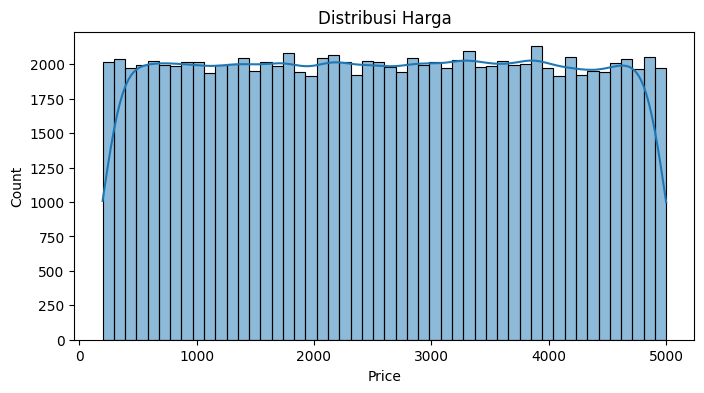

In [5]:
plt.figure(figsize=(8,4))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribusi Harga')
plt.show()

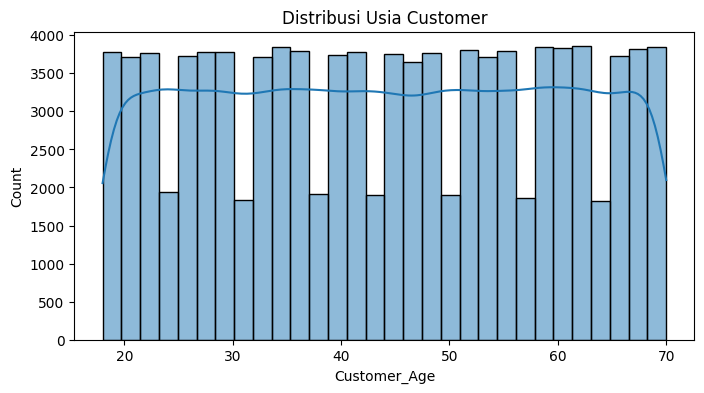

In [6]:
plt.figure(figsize=(8,4))
sns.histplot(df['Customer_Age'], bins=30, kde=True)
plt.title('Distribusi Usia Customer')
plt.show()

In [7]:
print("\nNilai unik Quantity:", df['Quantity'].unique())
print(df.groupby('Payment_Method')['Price'].sum().sort_values(ascending=False))


Nilai unik Quantity: [1 4 3 5 2]
Payment_Method
Apple Pay      43560175.14
Debit Card     43465152.78
Cash           43339432.71
Credit Card    43334315.29
Google Pay     43292139.57
PayPal         42827018.47
Name: Price, dtype: float64


In [8]:
print("\n=== Distribusi Harga ===")
print("Jumlah data  :", len(df['Price']))
print("Nilai minimum:", df['Price'].min())
print("Nilai maksimum:", df['Price'].max())
print("Rata-rata    :", df['Price'].mean())
print("Median       :", df['Price'].median())
print("Standar dev  :", df['Price'].std())
print("\nKuartil:")
print(df['Price'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

print("\n=== Distribusi Usia Customer ===")
print("Jumlah data  :", len(df['Customer_Age']))
print("Nilai minimum:", df['Customer_Age'].min())
print("Nilai maksimum:", df['Customer_Age'].max())
print("Rata-rata    :", df['Customer_Age'].mean())
print("Median       :", df['Customer_Age'].median())
print("Standar dev  :", df['Customer_Age'].std())
print("\nKuartil:")
print(df['Customer_Age'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))


=== Distribusi Harga ===
Jumlah data  : 100000
Nilai minimum: 200.01
Nilai maksimum: 4999.81
Rata-rata    : 2598.1823396000004
Median       : 2598.575
Standar dev  : 1384.943132758159

Kuartil:
0.25    1399.7875
0.50    2598.5750
0.75    3795.9825
0.90    4521.6910
0.95    4758.7870
0.99    4949.7300
Name: Price, dtype: float64

=== Distribusi Usia Customer ===
Jumlah data  : 100000
Nilai minimum: 18
Nilai maksimum: 70
Rata-rata    : 44.04341
Median       : 44.0
Standar dev  : 15.313760827589247

Kuartil:
0.25    31.0
0.50    44.0
0.75    57.0
0.90    65.0
0.95    68.0
0.99    70.0
Name: Customer_Age, dtype: float64


In [9]:
Q1_age = df['Customer_Age'].quantile(0.25)
Q3_age = df['Customer_Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
upper_bound_age = Q3_age + 1.5 * IQR_age
lower_bound_age = Q1_age - 1.5 * IQR_age

outliers_age = df[(df['Customer_Age'] > upper_bound_age) | (df['Customer_Age'] < lower_bound_age)]

print("\n=== Outliers Customer_Age ===")
print("Jumlah data:", len(df))
print("Jumlah outliers:", len(outliers_age))
print("Persentase outliers: {:.2f}%".format(100 * len(outliers_age) / len(df)))
print("Rentang wajar usia: {:.1f} - {:.1f}".format(lower_bound_age, upper_bound_age))
print("Nilai usia minimum:", df['Customer_Age'].min())
print("Nilai usia maksimum:", df['Customer_Age'].max())

Q1_qty = df['Quantity'].quantile(0.25)
Q3_qty = df['Quantity'].quantile(0.75)
IQR_qty = Q3_qty - Q1_qty
upper_bound_qty = Q3_qty + 1.5 * IQR_qty
lower_bound_qty = Q1_qty - 1.5 * IQR_qty

outliers_qty = df[(df['Quantity'] > upper_bound_qty) | (df['Quantity'] < lower_bound_qty)]

print("\n=== Outliers Quantity ===")
print("Jumlah data:", len(df))
print("Jumlah outliers:", len(outliers_qty))
print("Persentase outliers: {:.2f}%".format(100 * len(outliers_qty) / len(df)))
print("Rentang wajar Quantity: {:.1f} - {:.1f}".format(lower_bound_qty, upper_bound_qty))
print("Nilai Quantity minimum:", df['Quantity'].min())
print("Nilai Quantity maksimum:", df['Quantity'].max())


=== Outliers Customer_Age ===
Jumlah data: 100000
Jumlah outliers: 0
Persentase outliers: 0.00%
Rentang wajar usia: -8.0 - 96.0
Nilai usia minimum: 18
Nilai usia maksimum: 70

=== Outliers Quantity ===
Jumlah data: 100000
Jumlah outliers: 0
Persentase outliers: 0.00%
Rentang wajar Quantity: -1.0 - 7.0
Nilai Quantity minimum: 1
Nilai Quantity maksimum: 5


In [10]:
df = df.drop(['Sale_ID', 'Customer_ID', 'Salesperson_ID'], axis=1)
df

,Date,Bike_Model,Price,Quantity,Store_Location,Payment_Method,Customer_Age,Customer_Gender
0,2022-07-11,Cruiser,318.32,1,Philadelphia,Apple Pay,70,Female
1,2024-05-03,Hybrid Bike,3093.47,4,Chicago,Apple Pay,37,Male
2,2022-09-01,Folding Bike,4247.99,3,San Antonio,PayPal,59,Female
3,2022-09-28,Mountain Bike,1722.01,3,San Antonio,Apple Pay,19,Male
4,2021-01-05,BMX,3941.44,3,Philadelphia,PayPal,67,Female
...,...,...,...,...,...,...,...,...
99995,2022-06-16,Hybrid Bike,3088.13,2,Philadelphia,PayPal,60,Female
99996,2023-12-09,Road Bike,1051.44,2,Phoenix,Credit Card,67,Female
99997,2020-02-14,Folding Bike,2783.79,4,Phoenix,Google Pay,37,Female
99998,2023-12-13,Hybrid Bike,4265.42,4,Philadelphia,Credit Card,57,Male


In [11]:
df['Total_Spent'] = df['Price'] * df['Quantity']

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df

,Date,Bike_Model,Price,Quantity,Store_Location,Payment_Method,Customer_Age,Customer_Gender,Total_Spent,Year,Month
0,2022-07-11,Cruiser,318.32,1,Philadelphia,Apple Pay,70,Female,318.32,2022,7
1,2024-05-03,Hybrid Bike,3093.47,4,Chicago,Apple Pay,37,Male,12373.88,2024,5
2,2022-09-01,Folding Bike,4247.99,3,San Antonio,PayPal,59,Female,12743.97,2022,9
3,2022-09-28,Mountain Bike,1722.01,3,San Antonio,Apple Pay,19,Male,5166.03,2022,9
4,2021-01-05,BMX,3941.44,3,Philadelphia,PayPal,67,Female,11824.32,2021,1
...,...,...,...,...,...,...,...,...,...,...,...
99995,2022-06-16,Hybrid Bike,3088.13,2,Philadelphia,PayPal,60,Female,6176.26,2022,6
99996,2023-12-09,Road Bike,1051.44,2,Phoenix,Credit Card,67,Female,2102.88,2023,12
99997,2020-02-14,Folding Bike,2783.79,4,Phoenix,Google Pay,37,Female,11135.16,2020,2
99998,2023-12-13,Hybrid Bike,4265.42,4,Philadelphia,Credit Card,57,Male,17061.68,2023,12


In [12]:
df = df.dropna(subset=['Date'])
df = df.dropna()
df

,Date,Bike_Model,Price,Quantity,Store_Location,Payment_Method,Customer_Age,Customer_Gender,Total_Spent,Year,Month
0,2022-07-11,Cruiser,318.32,1,Philadelphia,Apple Pay,70,Female,318.32,2022,7
1,2024-05-03,Hybrid Bike,3093.47,4,Chicago,Apple Pay,37,Male,12373.88,2024,5
2,2022-09-01,Folding Bike,4247.99,3,San Antonio,PayPal,59,Female,12743.97,2022,9
3,2022-09-28,Mountain Bike,1722.01,3,San Antonio,Apple Pay,19,Male,5166.03,2022,9
4,2021-01-05,BMX,3941.44,3,Philadelphia,PayPal,67,Female,11824.32,2021,1
...,...,...,...,...,...,...,...,...,...,...,...
99995,2022-06-16,Hybrid Bike,3088.13,2,Philadelphia,PayPal,60,Female,6176.26,2022,6
99996,2023-12-09,Road Bike,1051.44,2,Phoenix,Credit Card,67,Female,2102.88,2023,12
99997,2020-02-14,Folding Bike,2783.79,4,Phoenix,Google Pay,37,Female,11135.16,2020,2
99998,2023-12-13,Hybrid Bike,4265.42,4,Philadelphia,Credit Card,57,Male,17061.68,2023,12


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [23]:
numerical_cols = ['Price', 'Quantity', 'Customer_Age', 'Total_Spent', 'Year', 'Month']
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

df = df.dropna()

le = LabelEncoder()
y = le.fit_transform(df['Customer_Gender'])  
X = df.drop(['Customer_Gender', 'Date'], axis=1)

In [24]:
categorical_cols = ['Bike_Model', 'Store_Location', 'Payment_Method']


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [26]:
preprocessor = ColumnTransformer([
    # Numerical pipeline: imputasi median + scaling
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numerical_cols),
    
    # Categorical pipeline: imputasi 'missing' + one hot
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_cols)
])

In [31]:
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('mlp', MLPClassifier(
        hidden_layer_sizes=(128, 64),
        activation='relu',
        solver='adam',
        max_iter=50,
        random_state=42,
        validation_fraction=0.1
    ))
])

In [32]:
pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Price', 'Quantity',
                                                   'Customer_Age',
                                                   'Total_Spent', 'Year',
                                                   'Month']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Bike_Model',
                                                   'Store_Location',
                                                   'Payment_Method'])])),
                ('mlp',
                 MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=50,
                               random_state=42))])

In [33]:
pipeline.fit(X_train, y_train)

C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Price', 'Quantity',
                                                   'Customer_Age',
                                                   'Total_Spent', 'Year',
                                                   'Month']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Bike_Model',
                                                   'Store_Location',
                                                   'Payment_Method'])])),
                ('mlp',
                 MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=50,
                               random_state=42))])

In [34]:
y_pred = pipeline.predict(X_test)

y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

print("\n✅ Accuracy:", accuracy_score(y_test_labels, y_pred_labels))
print(classification_report(y_test_labels, y_pred_labels))


✅ Accuracy: 0.50345
              precision    recall  f1-score   support

      Female       0.51      0.48      0.49     10045
        Male       0.50      0.52      0.51      9955

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [36]:
df['Avg_Spent_per_Bike'] = df['Total_Spent'] / df['Quantity']
df['Season'] = df['Month'] % 12 // 3 + 1

In [38]:
# Pastikan sudah ada Total_Spent
df['Total_Spent'] = df['Price'] * df['Quantity']

# 1️⃣ Price-based
median_price = df['Price'].median()
df['High_Price_Bike'] = (df['Price'] > median_price).astype(int)
df['Log_Price'] = np.log1p(df['Price'])

# 2️⃣ Temporal
df['Season'] = df['Month'] % 12 // 3 + 1
df['Day_of_Week'] = df['Date'].dt.dayofweek   # 0=Mon, ..., 6=Sun
df['Is_Weekend'] = (df['Day_of_Week'] >= 5).astype(int)

# 3️⃣ Age-based
df['Is_Senior'] = (df['Customer_Age'] > 55).astype(int)
df['Age_Group'] = pd.cut(df['Customer_Age'],
                         bins=[0, 25, 40, 55, 100],
                         labels=['<25', '25-40', '41-55', '>55'])

# 4️⃣ Per-item behavior
df['Avg_Spent_per_Bike'] = df['Total_Spent'] / df['Quantity']

# 5️⃣ Location-based (contoh: tier kota besar)
tier1_cities = ['New York', 'Chicago']
df['City_Tier'] = df['Store_Location'].apply(lambda x: 1 if x in tier1_cities else 2)

# 6️⃣ Interaction
df['Age_x_Price'] = df['Customer_Age'] * df['Price']
df['Year_x_Month'] = df['Year'] * df['Month']


In [39]:
df

,Date,Bike_Model,Price,Quantity,Store_Location,Payment_Method,Customer_Age,Customer_Gender,Total_Spent,Year,...,Season,High_Price_Bike,Log_Price,Day_of_Week,Is_Weekend,Is_Senior,Age_Group,City_Tier,Age_x_Price,Year_x_Month
0,2022-07-11,Cruiser,318.32,1,Philadelphia,Apple Pay,70,Female,318.32,2022,...,3,0,5.766194,0,0,1,>55,2,22282.40,14154
1,2024-05-03,Hybrid Bike,3093.47,4,Chicago,Apple Pay,37,Male,12373.88,2024,...,2,1,8.037372,4,0,0,25-40,1,114458.39,10120
2,2022-09-01,Folding Bike,4247.99,3,San Antonio,PayPal,59,Female,12743.97,2022,...,4,1,8.354437,3,0,1,>55,2,250631.41,18198
3,2022-09-28,Mountain Bike,1722.01,3,San Antonio,Apple Pay,19,Male,5166.03,2022,...,4,0,7.451828,2,0,0,<25,2,32718.19,18198
4,2021-01-05,BMX,3941.44,3,Philadelphia,PayPal,67,Female,11824.32,2021,...,1,1,8.279555,1,0,1,>55,2,264076.48,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2022-06-16,Hybrid Bike,3088.13,2,Philadelphia,PayPal,60,Female,6176.26,2022,...,3,1,8.035645,3,0,1,>55,2,185287.80,12132
99996,2023-12-09,Road Bike,1051.44,2,Phoenix,Credit Card,67,Female,2102.88,2023,...,1,0,6.958867,5,1,1,>55,2,70446.48,24276
99997,2020-02-14,Folding Bike,2783.79,4,Phoenix,Google Pay,37,Female,11135.16,2020,...,1,1,7.931928,4,0,0,25-40,2,103000.23,4040
99998,2023-12-13,Hybrid Bike,4265.42,4,Philadelphia,Credit Card,57,Male,17061.68,2023,...,1,1,8.358530,2,0,1,>55,2,243128.94,24276


In [40]:
# Pastikan Customer_Gender masih ada di df, dan targetnya
grouped = df.groupby('Customer_Gender')

print("\n=== Distribusi Fitur Numerik per Gender ===")
numerical_features = [
    'Price', 'Quantity', 'Customer_Age', 'Total_Spent', 'Log_Price',
    'Avg_Spent_per_Bike', 'Age_x_Price', 'Year', 'Month', 'Year_x_Month'
]

for col in numerical_features:
    print(f"\n📊 Fitur: {col}")
    print(grouped[col].describe()[['mean', '50%', 'std', 'min', 'max']])

# ---------------------------------------

print("\n=== Distribusi Fitur Kategorikal per Gender ===")
categorical_features = [
    'Bike_Model', 'Store_Location', 'Payment_Method',
    'Age_Group', 'Season', 'Day_of_Week', 'Is_Weekend',
    'Is_Senior', 'High_Price_Bike', 'City_Tier'
]

for col in categorical_features:
    print(f"\n📊 Fitur: {col}")
    dist = pd.crosstab(df[col], df['Customer_Gender'], normalize='columns') * 100
    print(dist.round(2))



=== Distribusi Fitur Numerik per Gender ===

📊 Fitur: Price
                        mean      50%          std     min      max
Customer_Gender                                                    
Female           2599.665592  2604.14  1388.247883  200.03  4999.75
Male             2596.685558  2593.91  1381.612557  200.01  4999.81

📊 Fitur: Quantity
                     mean  50%       std  min  max
Customer_Gender                                   
Female           3.003126  3.0  1.411624  1.0  5.0
Male             2.991039  3.0  1.416854  1.0  5.0

📊 Fitur: Customer_Age
                      mean   50%        std   min   max
Customer_Gender                                        
Female           43.976228  44.0  15.242625  18.0  70.0
Male             44.111205  44.0  15.385068  18.0  70.0

📊 Fitur: Total_Spent
                        mean     50%          std     min       max
Customer_Gender                                                    
Female           7810.825827  6248.7  5

In [43]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [44]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [45]:
le = LabelEncoder()
df['Customer_Gender_encoded'] = le.fit_transform(df['Customer_Gender'])

# Pilih fitur
numerical_cols = [
    'Price', 'Quantity', 'Customer_Age', 'Total_Spent', 'Log_Price',
    'Avg_Spent_per_Bike', 'Age_x_Price', 'Year', 'Month', 'Year_x_Month'
]
categorical_cols = [
    'Bike_Model', 'Store_Location', 'Payment_Method',
    'Age_Group', 'Season', 'Day_of_Week', 'Is_Weekend',
    'Is_Senior', 'High_Price_Bike', 'City_Tier'
]

X = df[numerical_cols + categorical_cols]
y = df['Customer_Gender_encoded']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [49]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0],
}

In [50]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

search = RandomizedSearchCV(
    pipeline, param_distributions=param_grid,
    n_iter=10, cv=3, scoring='accuracy', verbose=2, n_jobs=-1, random_state=42
)

In [51]:
search

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['Price',
                                                                                'Quantity',
                                                                                'Customer_Age',
                                                                                'Total_Spent',
                                                                                'Log_Price',
                                                                                'Avg_Spent_per_Bike',
                                                                                'Age_x_Price',
                                                                                'Year',
                                                                                'Month',
                                                                                'Year_x_Month']),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['Bike_Model',
                                                                                'Store_Location',
                                                                                'Payment_Method',
                                                                                'Age_G...
                                                            monotone_constraints=None,
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=None,
                                                            num_parallel_tree=None, ...))]),
                   n_jobs=-1,
                   param_distributions={'classifier__colsample_bytree': [0.8,
                                                                         1.0],
                                        'classifier__learning_rate': [0.01, 0.1,
                                                                      0.2],
                                        'classifier__max_depth': [3, 5, 7],
                                        'classifier__n_estimators': [100, 200],
                                        'classifier__subsample': [0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=2)

In [52]:
search.fit(X_train, y_train)

print("\n✅ Best params:", search.best_params_)
best_model = search.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:05:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ Best params: {'classifier__subsample': 0.8, 'classifier__n_estimators': 100, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.01, 'classifier__colsample_bytree': 0.8}


In [53]:
y_pred = best_model.predict(X_test)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))



✅ Accuracy: 0.50255
              precision    recall  f1-score   support

      Female       0.50      0.77      0.61     10045
        Male       0.50      0.23      0.32      9955

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.46     20000
weighted avg       0.50      0.50      0.46     20000



In [54]:
print(y_train.value_counts(normalize=True))


Customer_Gender_encoded
0    0.502275
1    0.497725
Name: proportion, dtype: float64


In [55]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb)
])

pipeline.fit(X_train, y_train)

# Ambil nama fitur hasil OneHot + numerik
onehot = pipeline.named_steps['preprocessor'].transformers_[1][1]
ohe_feature_names = onehot.get_feature_names_out(categorical_cols)
all_features = numerical_cols + list(ohe_feature_names)

# Ambil feature importance
importances = pipeline.named_steps['classifier'].feature_importances_
feat_imp = sorted(zip(all_features, importances), key=lambda x: x[1], reverse=True)

# Print
print("\n=== Feature Importance ===")
for f, imp in feat_imp:
    print(f"{f:30} {imp:.4f}")

C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:08:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Feature Importance ===
Day_of_Week_6                  0.0259
Payment_Method_Google Pay      0.0258
Bike_Model_Hybrid Bike         0.0257
Day_of_Week_1                  0.0257
Bike_Model_Folding Bike        0.0249
Store_Location_Phoenix         0.0248
Bike_Model_BMX                 0.0248
Store_Location_Houston         0.0248
Total_Spent                    0.0246
Day_of_Week_5                  0.0245
Bike_Model_Cruiser             0.0242
Day_of_Week_2                  0.0242
Year_x_Month                   0.0242
Bike_Model_Road Bike           0.0240
Payment_Method_Debit Card      0.0240
Store_Location_Los Angeles     0.0240
Payment_Method_Cash            0.0239
Day_of_Week_3                  0.0238
Store_Location_New York        0.0238
Payment_Method_Apple Pay       0.0238
Age_x_Price                    0.0237
Day_of_Week_0                  0.0235
Store_Location_San Antonio     0.0235
Season_4                       0.0234
Store_Location_Philadelphia    0.0232
Store_Location_Chicago

In [58]:
df['Is_Weekend_Sale'] = df['Day_of_Week'].isin([5,6]).astype(int)

# Rata-rata harga bike per payment method
avg_price_per_payment = df.groupby('Payment_Method')['Price'].transform('mean')
df['PaymentMethod_AvgPrice'] = avg_price_per_payment

# Gap usia customer ke median kota
median_age_per_city = df.groupby('Store_Location')['Customer_Age'].transform('median')
df['Gap_Age_MedianCity'] = df['Customer_Age'] - median_age_per_city

In [62]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [63]:
clf1 = LogisticRegression(max_iter=1000)
clf2 = DecisionTreeClassifier(max_depth=5, random_state=42)
clf3 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
clf4 = LGBMClassifier()

ensemble = VotingClassifier(
    estimators=[
        ('lr', clf1), ('dt', clf2), ('xgb', clf3), ('lgb', clf4)
    ],
    voting='soft', n_jobs=-1
)

pipeline_ens = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', ensemble)
])

pipeline_ens.fit(X_train, y_train)
y_pred_ens = pipeline_ens.predict(X_test)

print("\n✅ Accuracy ensemble:", accuracy_score(y_test, y_pred_ens))
print(classification_report(y_test, y_pred_ens, target_names=le.classes_))


✅ Accuracy ensemble: 0.4991
              precision    recall  f1-score   support

      Female       0.50      0.55      0.52     10045
        Male       0.50      0.45      0.47      9955

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [64]:
df_test = X_test.copy()
df_test['true_gender'] = y_test
df_test['pred_gender'] = y_pred_ens

# Senior (>55)
senior_mask = df_test['Customer_Age'] > 55
print("\n=== Senior (>55) ===")
print(df_test[senior_mask]['true_gender'].value_counts())
print(df_test[senior_mask]['pred_gender'].value_counts())

# Muda (<25)
young_mask = df_test['Customer_Age'] < 25
print("\n=== Young (<25) ===")
print(df_test[young_mask]['true_gender'].value_counts())
print(df_test[young_mask]['pred_gender'].value_counts())


=== Senior (>55) ===
true_gender
0    2847
1    2819
Name: count, dtype: int64
pred_gender
1    3326
0    2340
Name: count, dtype: int64

=== Young (<25) ===
true_gender
1    1347
0    1303
Name: count, dtype: int64
pred_gender
0    1413
1    1237
Name: count, dtype: int64


In [66]:
print("\n=== Distribusi Gender di segmen High_Price_Bike ===")
tbl = df.groupby(['High_Price_Bike', 'Customer_Gender']).size().unstack()
tbl_pct = tbl.div(tbl.sum(axis=1), axis=0) * 100
print(tbl_pct)

print("\n=== Distribusi Gender per Payment_Method ===")
tbl = df.groupby(['Payment_Method', 'Customer_Gender']).size().unstack()
tbl_pct = tbl.div(tbl.sum(axis=1), axis=0) * 100
print(tbl_pct)


print("\n=== Korelasi numerik (point biserial) ===")
from scipy.stats import pointbiserialr
for col in ['Price', 'Quantity', 'Customer_Age', 'Total_Spent']:
    corr, p = pointbiserialr(df['Customer_Gender_encoded'], df[col])
    print(f"{col}: corr={corr:.4f}, p-value={p:.4f}")

print("\n=== Mutual Information categorical ===")
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(
    pd.get_dummies(df[['Payment_Method','Bike_Model','Store_Location','Season','Age_Group']]),
    df['Customer_Gender_encoded'],
    discrete_features=True
)
for f, score in zip(pd.get_dummies(df[['Payment_Method','Bike_Model','Store_Location','Season','Age_Group']]).columns, mi):
    print(f"{f}: MI={score:.4f}")



=== Distribusi Gender di segmen High_Price_Bike ===
Customer_Gender  Female    Male
High_Price_Bike                
0                50.150  49.850
1                50.304  49.696

=== Distribusi Gender per Payment_Method ===
Customer_Gender     Female       Male
Payment_Method                       
Apple Pay        50.999940  49.000060
Cash             49.988018  50.011982
Credit Card      49.396505  50.603495
Debit Card       50.256900  49.743100
Google Pay       50.267863  49.732137
PayPal           50.450069  49.549931

=== Korelasi numerik (point biserial) ===
Price: corr=-0.0011, p-value=0.7337
Quantity: corr=-0.0043, p-value=0.1766
Customer_Age: corr=0.0044, p-value=0.1634
Total_Spent: corr=-0.0045, p-value=0.1522

=== Mutual Information categorical ===
Season: MI=0.0000
Payment_Method_Apple Pay: MI=0.0000
Payment_Method_Cash: MI=0.0000
Payment_Method_Credit Card: MI=0.0000
Payment_Method_Debit Card: MI=0.0000
Payment_Method_Google Pay: MI=0.0000
Payment_Method_PayPal: MI=0.00

In [69]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Total spent per transaksi
df['Total_Spent'] = df['Price'] * df['Quantity']

# === diff_weekday_vs_weekend_spending ===
df['Day_of_Week'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6
df['Is_Weekend'] = (df['Day_of_Week'] >= 5).astype(int)
df['Weekend_Spent'] = df['Total_Spent'] * df['Is_Weekend']
df['Weekday_Spent'] = df['Total_Spent'] * (1 - df['Is_Weekend'])
df['Diff_Weekend_Weekday_Spent'] = df['Weekend_Spent'] - df['Weekday_Spent']

# === spending_last_3_months vs spending_total ===
max_date = df['Date'].max()
three_months_ago = max_date - pd.DateOffset(months=3)
df['In_Last_3_Months'] = (df['Date'] >= three_months_ago).astype(int)
df['Spent_Last_3_Months'] = df['Total_Spent'] * df['In_Last_3_Months']
# Kita juga punya Total_Spent per transaksi; rasio proxy:
df['Spent_Ratio_Last3_Total'] = df['Spent_Last_3_Months'] / (df['Total_Spent'] + 1e-5)

# === is_loyal_customer (proxy) ===
median_price = df['Price'].median()
median_age = df['Customer_Age'].median()
df['Is_Loyal'] = ((df['Price'] > median_price) | (df['Customer_Age'] > median_age)).astype(int)

print("\n✅ Kolom baru:")
print(df[['Diff_Weekend_Weekday_Spent', 'Spent_Last_3_Months', 'Spent_Ratio_Last3_Total', 'Is_Loyal']].head())



✅ Kolom baru:
   Diff_Weekend_Weekday_Spent  Spent_Last_3_Months  Spent_Ratio_Last3_Total  \
0                     -318.32                  0.0                      0.0   
1                   -12373.88                  0.0                      0.0   
2                   -12743.97                  0.0                      0.0   
3                    -5166.03                  0.0                      0.0   
4                   -11824.32                  0.0                      0.0   

   Is_Loyal  
0         1  
1         1  
2         1  
3         0  
4         1  


In [70]:
numeric_features = [
    'Price', 'Quantity', 'Customer_Age', 'Total_Spent',
    'Age_x_Price', 'Year_x_Month', 'Month', 'Year',
    'Diff_Weekend_Weekday_Spent', 'Spent_Last_3_Months',
    'Spent_Ratio_Last3_Total', 'Is_Loyal'
]

# Fitur kategorikal
categorical_features = [
    'Bike_Model', 'Store_Location', 'Payment_Method',
    'Season', 'Age_Group', 'Day_of_Week', 'City_Tier'
]

# Preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [71]:
# Base models
clf1 = LogisticRegression(max_iter=1000)
clf2 = DecisionTreeClassifier(max_depth=5, random_state=42)
clf3 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
clf4 = LGBMClassifier()

# Ensemble Voting
ensemble = VotingClassifier(
    estimators=[
        ('lr', clf1), ('dt', clf2), ('xgb', clf3), ('lgb', clf4)
    ],
    voting='soft', n_jobs=-1
)

# Pipeline
pipeline_ens = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', ensemble)
])


In [72]:
pipeline_ens

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Price', 'Quantity',
                                                   'Customer_Age',
                                                   'Total_Spent', 'Age_x_Price',
                                                   'Year_x_Month', 'Month',
                                                   'Year',
                                                   'Diff_Weekend_Weekday_Spent',
                                                   'Spent_Last_3_Months',
                                                   'Spent_Ratio_Last3_Total',
                                                   'Is_Loyal']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Bike_Model',
                                                   'Store_Location',
                                                   'P...
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None, ...)),
                                              ('lgb', LGBMClassifier())],
                                  n_jobs=-1, voting='soft'))])

In [73]:
pipeline_ens.fit(X_train, y_train)


ValueError: A given column is not a column of the dataframe

In [75]:
# Asumsikan df_train dan df_test adalah X_train dan X_test
# Tambahkan kolom baru yang sudah kita buat
for col in ['Diff_Weekend_Weekday_Spent', 'Spent_Last_3_Months', 
            'Spent_Ratio_Last3_Total', 'Is_Loyal']:
    X_train[col] = df.loc[X_train.index, col]
    X_test[col] = df.loc[X_test.index, col]
print(X_train.columns)


Index(['Price', 'Quantity', 'Customer_Age', 'Total_Spent', 'Log_Price',
       'Avg_Spent_per_Bike', 'Age_x_Price', 'Year', 'Month', 'Year_x_Month',
       'Bike_Model', 'Store_Location', 'Payment_Method', 'Age_Group', 'Season',
       'Day_of_Week', 'Is_Weekend', 'Is_Senior', 'High_Price_Bike',
       'City_Tier', 'Diff_Weekend_Weekday_Spent', 'Spent_Last_3_Months',
       'Spent_Ratio_Last3_Total', 'Is_Loyal'],
      dtype='object')


In [76]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# ✅ Pastikan sesuai dengan kolom yang ada
numeric_features = [
    'Price', 'Quantity', 'Customer_Age', 'Total_Spent', 'Log_Price',
    'Avg_Spent_per_Bike', 'Age_x_Price', 'Year', 'Month', 'Year_x_Month',
    'Diff_Weekend_Weekday_Spent', 'Spent_Last_3_Months',
    'Spent_Ratio_Last3_Total', 'Is_Loyal'
]

categorical_features = [
    'Bike_Model', 'Store_Location', 'Payment_Method', 'Age_Group',
    'Season', 'Day_of_Week', 'Is_Weekend', 'Is_Senior',
    'High_Price_Bike', 'City_Tier'
]

# Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Ensemble classifier
clf1 = LogisticRegression(max_iter=1000)
clf2 = DecisionTreeClassifier(max_depth=5, random_state=42)
clf3 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
clf4 = LGBMClassifier()

ensemble = VotingClassifier(
    estimators=[
        ('lr', clf1), ('dt', clf2), ('xgb', clf3), ('lgb', clf4)
    ],
    voting='soft', n_jobs=-1
)

# Final pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', ensemble)
])

# Training
pipeline.fit(X_train, y_train)

# Prediction & evaluation
y_pred = pipeline.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))



✅ Accuracy: 0.5027
              precision    recall  f1-score   support

      Female       0.50      0.55      0.53     10045
        Male       0.50      0.45      0.47      9955

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
